## Unsupervised Capstone Project

### Ten articles with 10 different authors have been selected for this project. The articles are obtained from free Gutenberg Project and they are all Christmas-related.

In [1]:
import timeit
start=timeit.default_timer()

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import spacy
nlp = spacy.load('en')
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load files

In [6]:
filename=['brady.txt','butler.txt','cutting.txt','dawson.txt','dyke.txt',
          'hughes.txt','mitchell.txt','richmond.txt','rinehart.txt','stretton.txt']
#filename=['brady.txt','butler.txt']

In [7]:
def load_text(filename):
    file=open(filename,'r')
    text=file.read()
    file.close
    return text

In [8]:
def clean_text(text):
    text=text.lower()
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in text:
       if char not in punctuations:
           no_punct = no_punct + char
    
    no_punct=no_punct.replace("ï»¿"," ")
    no_punct=no_punct.replace("\n"," ")
    
    return no_punct

In [9]:
def sep_text(text):
    text=text.split()
    
    k=60 # Number of sentences
    size=int(len(text)/k)
    para=[None]*k
    j=0
    
    for i in range(0,k):
        para[i]=text[j:j+size]
        para[i]=' '.join(para[i])
        j=j+size
    
    return para

## K-Means Clustering

In [10]:
n_max=600

In [11]:
#vectorizer = TfidfVectorizer(stop_words='english',max_features=n_max)

In [12]:
vectorizer=CountVectorizer(stop_words="english", 
                           analyzer='word', 
                           ngram_range=(1, 4), 
                           max_df=1.0, 
                           min_df=1, 
                           max_features=n_max)

In [13]:
df = pd.DataFrame()
for i in range(len(filename)):
    text=load_text(filename[i])
    text=clean_text(text)
    text=sep_text(text)
    
    X = vectorizer.fit_transform(text)
    X_np=X.todense()
    X_df=pd.DataFrame(X_np)
    
    #author=filename[i].replace('.txt','')
    #X_df['author']=author   
    X_df['author']=i
    
    df=df.append(X_df)

In [14]:
df.shape

(600, 601)

In [15]:
x=df.drop(['author'],axis=1)
y=df['author']

In [16]:
model = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=100)

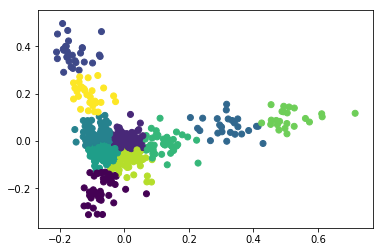

In [17]:
x_norm=normalize(x)
x_pca=PCA(2).fit_transform(x_norm)
y_pred=model.fit_predict(x_pca)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred)
plt.show()

## Confusion Matrix

In [18]:
y_pred=model.fit_predict(x_norm)
pd.crosstab(y,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9
author,,,,,,,,,,
0,5,3,44,1,0,1,4,2,0,0
1,0,0,0,0,0,0,0,5,12,43
2,11,40,0,0,0,0,0,5,4,0
3,0,3,0,2,0,0,51,3,1,0
4,13,9,2,0,1,0,15,11,9,0
5,9,8,2,1,1,1,1,24,13,0
6,9,2,0,0,0,40,0,8,0,1
7,9,17,0,0,0,1,2,13,18,0
8,3,1,1,0,39,4,0,11,1,0


## Clustering Accuracy

In [19]:
accuracy_score(y,y_pred)

0.03833333333333333

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [21]:
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=3, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pred=model.predict(x_train)
metrics.adjusted_rand_score(y_train, y_pred)

0.06565851869025038

In [23]:
y_pred=model.predict(x_test)    
metrics.adjusted_rand_score(y_test, y_pred)

0.05888559469362262

In [24]:
model.fit(x)
labels=model.labels_

score=metrics.silhouette_score(x, labels, metric='euclidean')
print(score)

0.024143030800077434


## Supervised Learning Classification

In [25]:
text_list=[]
for i in range(len(filename)):
    text=load_text(filename[i])
    text=clean_text(text)
    text=sep_text(text)
    text_list=text_list+text

text_list=[]
len_list=[None]*(len(filename)+1)
len_list[0]=0
for i in range(0,len(filename)):
    text=load_text(filename[i])
    text=clean_text(text)
    temp_list=text.split(".")
    len_list[i+1]=len_list[i]+len(temp_list)
    text_list=text_list+temp_list

In [26]:
len(text_list)

600

In [27]:
df.shape

(600, 601)

## Bag of Words

In [28]:
vectorizer=CountVectorizer(stop_words="english", 
                           analyzer='word', 
                           ngram_range=(1, 4), 
                           max_df=1.0, 
                           min_df=1, 
                           max_features=n_max)

In [29]:
x = vectorizer.fit_transform(text_list)
x = x.toarray()
x.shape

(600, 600)

In [30]:
y=df['author']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    )

In [32]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)
print('Training set score:', rfc.score(x_train, y_train))
print('\nTest set score:', rfc.score(x_test, y_test))

Training set score: 0.9977777777777778

Test set score: 0.78


In [33]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Training set score:', lr.score(x_train, y_train))
print('\nTest set score:', lr.score(x_test, y_test))

Training set score: 1.0

Test set score: 0.8866666666666667


## TFIDF

In [34]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=n_max)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [35]:
x = vectorizer.fit_transform(text_list)
x = x.toarray()
x.shape

(600, 600)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.25,
                                                    )

In [37]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)
print('Training set score:', rfc.score(x_train, y_train))
print('\nTest set score:', rfc.score(x_test, y_test))

Training set score: 0.9955555555555555

Test set score: 0.8733333333333333


In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Training set score:', lr.score(x_train, y_train))
print('\nTest set score:', lr.score(x_test, y_test))

Training set score: 0.9977777777777778

Test set score: 0.9466666666666667
